# **7. Singular Value Decomposition (SVD) on Data**
- Apply SVD to a data matrix extracted from the MNIST dataset $(\(X \in \mathbb{R}^{n \times 784}\)$, with a small $\(n\)$).
- Reproject the images using only the largest singular values.
- Observe how the loss of singular values impacts the quality of the reconstructed data.

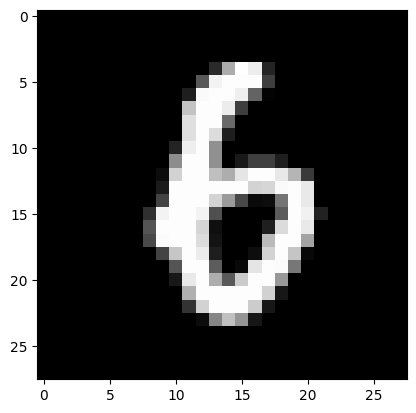

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

MNIST_path = '../MNIST_data'

train_loader = torch.utils.data.DataLoader(
    datasets.MNIST(MNIST_path, train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=64, shuffle=True)

# get some random training images and their labels, when we use next dataiter it returns the next batch ( we defined as 64 imagens )
dataiter = iter(train_loader)
images, labels = next(dataiter)

img1 = images[0].numpy()
img1 = np.transpose(img1, (1, 2, 0))

plt.imshow(img1, cmap='gray')
plt.show()

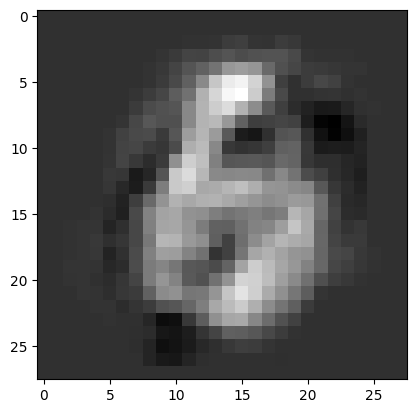

In [10]:
# execute SVD on a data matrix extracted from the MNIST dataset (images)

import numpy as np

images_flat = images.view(images.size(0), -1).numpy()  # [batch_size, 784]

# SVD -> U, singular values, V.T
U, s, Vh = np.linalg.svd(images_flat, full_matrices=False)

k = 10
U_k = U[:, :k]
s_k = np.diag(s[:k])
Vh_k = Vh[:k, :]

X_reconstructed = np.dot(U_k, np.dot(s_k, Vh_k))

img_reconstructed = X_reconstructed[0].reshape(28, 28)
plt.imshow(img_reconstructed, cmap='gray')
plt.show()


# **8. Trace and Determinant**
- Generate a random matrix $\(A \in \mathbb{R}^{10 \times 10}\)$ and calculate its trace.
- Use the trace to interpret the sum of eigenvalues.
- Calculate the determinant of matrix $\(A\)$ and analyze its relation to invertibility.